In [1]:
import os

In [2]:
#!pip install tensorflow-gpu

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
os.getcwd()

'/content'

In [5]:
os.chdir('/content/drive/MyDrive/project')

In [6]:
os.getcwd()

'/content/drive/MyDrive/project'

In [7]:
!nvidia-smi


Thu Jun  2 17:44:47 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [8]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession


In [9]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [10]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/project/dataset/training_validation/train'
valid_path = '/content/drive/MyDrive/project/dataset/training_validation/valid'

In [11]:
#inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
import tensorflow
resnet152V2 =tensorflow.keras.applications.ResNet152V2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [12]:
# don't train existing weights
for layer in resnet152V2.layers:
    layer.trainable = False

In [13]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/project/dataset/training_validation/train/*')

In [14]:
x = Flatten()(resnet152V2.output)

In [15]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet152V2.input, outputs=prediction)

In [16]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [17]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [18]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [19]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/project/dataset/training_validation/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5702 images belonging to 2 classes.


In [20]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/project/dataset/training_validation/valid',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1426 images belonging to 2 classes.


In [21]:
!pip install tensorflow==2.7.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
# fit the model
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=21,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/21
179/179 [==============================] - 1131s 6s/step - loss: 0.9648 - accuracy: 0.9418 - val_loss: 0.1326 - val_accuracy: 0.9804
Epoch 2/21
179/179 [==============================] - 97s 540ms/step - loss: 0.1506 - accuracy: 0.9809 - val_loss: 0.1171 - val_accuracy: 0.9867
Epoch 3/21
179/179 [==============================] - 97s 543ms/step - loss: 0.1340 - accuracy: 0.9844 - val_loss: 0.0943 - val_accuracy: 0.9895
Epoch 4/21
179/179 [==============================] - 97s 544ms/step - loss: 0.2323 - accuracy: 0.9835 - val_loss: 0.3471 - val_accuracy: 0.9741
Epoch 5/21
179/179 [==============================] - 97s 540ms/step - loss: 0.1661 - accuracy: 0.9858 - val_loss: 0.0858 - val_accuracy: 0.9916
Epoch 6/21
179/179 [==============================] - 97s 541ms/step - loss: 0.1004 - accuracy: 0.9916 - val_loss: 0.0635 - val_accuracy: 0.9951
Epoch 7/21
179/179 [==============================] - 98s 545ms/step - loss: 0.0705 - accuracy: 0.9939 - val_loss: 0.0593 - val_acc

In [23]:
import matplotlib.pyplot as plt

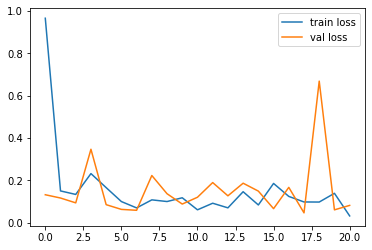

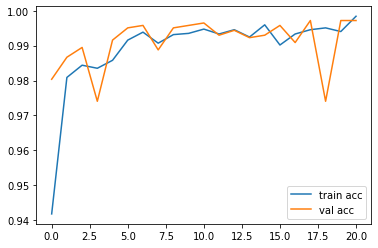

<Figure size 432x288 with 0 Axes>

In [24]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [25]:
from tensorflow.keras.models import load_model

model.save('model_resnet152V2.h5')

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [33]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 992 kB 7.0 MB/s 


In [36]:
import visualkeras

SyntaxError: ignored

In [37]:
!pip install pydot
!pip install pydotplus
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


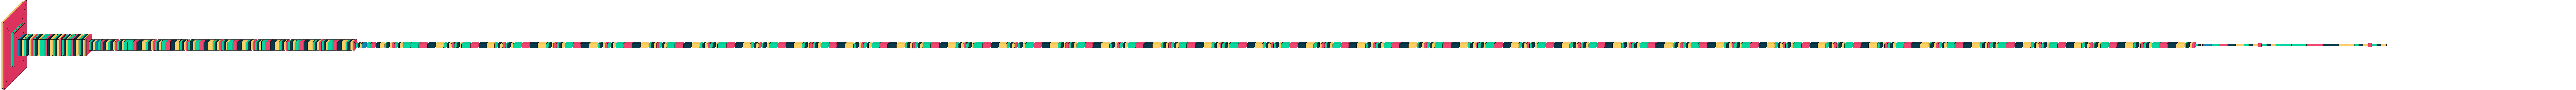

In [35]:
visualkeras.layered_view(model) 

In [39]:
model_img_file = 'model.png'
tensorflow.keras.utils.plot_model(model, to_file=model_img_file, 
                          show_shapes=True, 
                          show_layer_activations=True, 
                          show_dtype=True,
                          show_layer_names=True )

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.529996 to fit



In [26]:
y_pred = model.predict(test_set)

In [27]:
y_pred

array([[5.5885885e-21, 1.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       ...,
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00]], dtype=float32)

In [28]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [29]:
y_pred


array([1, 0, 1, ..., 0, 0, 0])

In [30]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [31]:
model=load_model('model_resnet152V2.h5')

In [32]:
img=image.load_img('dataset/testing/test/PotatoEarlyBlight2.jpg',target_size=(224,224))

FileNotFoundError: ignored

In [ ]:
x=image.img_to_array(img)
x

In [ ]:
x.shape

In [ ]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

In [ ]:
model.predict(img_data)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)